
# 베이지안 통계 개론 (Bayesian Inference)

# 총 확률의 법칙 (The Law of Total Probability)

정의에 따르면, $A$라는 특정 확률 변수에 대해, 모든 가능한 이벤트의 총 확률은 1입니다. 즉 :

$$P(A) = \sum_n P(A_n) = 1$$

예를 들면 **스팸메일이다** 라는 "확률 변수"는, 가능한 이벤트로 

1. 스팸메일인경우
2. 정상메일인경우

각각 0.8과 0.2로 (**예시**) 총 합은 1.

조금 더 나아가서, 2개의 변수를 고려 한다면 ($A$ 와 $B$), 
두 변수가 연관이 있는 경우, $B$가 일어난 상황에서의, $A$에 대한 확률 $P(A)$는, $P(A|B)$의 형태로 표현됨. 

(반대로 연관이 없는 경우에는 $B$가 일어난 상황에서, $A$에 대한 확률 $P(A)$는 $P(A) * P(B)$ .)

예를 들면 **스팸메일이다**와, **메일 내부에 "스팸"단어가 있다** 과 같은 이벤트라면

$P(spam)$ = $P(spam|included)P(included)$ + $P(spam|not~included)P(not~included)$ 로 표현 될 수 있음.

즉,

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

다시말해 $A$의 모든 확률은, 주어진 $B_n$에 대해서, 각각의 일어날 확률의 총합으로 표현 될 수 있음.

예를 들어. 

$A$ -> 1 or 2

$B$ -> 1 or 2

- $p(A=1)$ 일 확률은 

  - $p(B=1) \cdot p( A=1 | B=1 )$ 와

  - $p(B=2) \cdot p( A=1 | B=2 )$ 인 경우 2가지로 나뉠 것이고

- $p(A=2)$일 확률은

  - $p(B=1) * p(A=2 | B=1)$ 와

  - $p(B=2) * p(A=2 | B=2)$ 인 경우 2가지로 나뉘어지게 됨.

그렇기 때문에

$$ p(A=1) = p(B=1) \cdot p( A=1 | B=1 ) + p(B=2) \cdot p( A=1 | B=2 ) $$

로 표현 될 수 있음.

# 조건부 확률 (The Law of Conditional Probability)

다른 이벤트가 일어난 상황에서의 조건은 어떻게 구할 수 있을까

실제 계산 되는 부분의 식은 아래와 같음:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

전체 사각형이 모든 가능한 확률 공간이고, 

$A$는 왼쪽 원, $B$는 오른쪽 원이며 그 교집합이 가운데 붉은 부분. 

위의 식에 $P(B)$를 양변에 곱하면, $P(A|B)P(B) = P(A \cap B)$ 와 같은 식을 얻을 수 있으며, 

이는 곧 $P(A|B) = \sum_n P(A \cap B_n)$를 의미함.

이는, $B$라는 정보가 주어진 상황에서 $A$의 확률은 $B$와 교집합들의 합으로 구성 되어 있다는 것을 이해 할 수 있음. 

## 베이지안 이론 (Bayes Theorem)

아래는 베이지안의 핵심공식과 유도과정:

$$P(A|B) = {{P(A \cap B)} \over {P(B)}} $$

$$P(B|A) = {{P(B \cap A)} \over {P(A)}} $$

Since 

$$P(A \cap B) = P(B \cap A),$$

Therefore

$$P(A|B) \cdot P(B) = P(B|A) \cdot P(A)$$

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

이는 $B$가 주어진 상황에서 $A$의 확률은 $A$가 주어진 상황에서의 $B$의 확률 곱하기 $A$의 확률, 나누기 $B$ 의 확률로 표현.

$p(A|B)$ -> 사후 확률. (B라는 정보가 업데이트 된 이후의 사(이벤트)후 확률)

$p(A)$ -> 사전 확률. B라는 정보가 업데이트 되기 전의 사전확률

$p(B|A)$ -> likelihood

여기서 조건이 붙지 않은 확률 은 사전확률("Prior"), 조건이 붙은 부분은 사후확률("Updated")로 다시 표현 할 수 있음.


$$p(A) = p(A | B) \cdot p(B)+ p(A | not B) \cdot p(not B)$$

## 약물 양성반응 예시 계산

다시 한번 정리하자면, 베이지안에서의 $P(A|B)$는 $B$라는 추가 정보를 바탕으로 한 $A$의 확률

- TPR : **T**rue **P**ositive **R**ate (= 민감도, true accept rate)
1인 케이스에 대해 1로 잘 예측한 비율.(암환자를 암이라고 진단 함)

- FPR : **F**alse **P**ositive **R**ate (= 1-특이도, false accept rate)
0인 케이스에 대해 1로 잘못 예측한 비율.(암환자가 아닌데 암이라고 진단 함)

**이전 계산의 사후확률을 새로운 계산의 사전확률로 사용한다**



In [5]:
# 베이지안 계산을 위해서는 4개의 변수가 필요

p_pos_used = 0.99 # True positive rate (TPR, Sensitivity)
p_used = 0.005 # prior probability
p_pos_not_used = 0.01 # False positive rate (FPR)
p_not_used = 1 - p_used # 1 - p_used  

numerator = p_pos_used * p_used 

denominator = (p_pos_used * p_used) + (p_pos_not_used * p_not_used)

posterior_probability = numerator / denominator

posterior_probability

0.33221476510067116

In [6]:
p_pos_used = 0.99 # TPR
p_used = 0.332 # prior probability
p_pos_not_used = 0.01 # FPR
p_not_used = 1 - p_used # 1 - p_used  

numerator = p_pos_used * p_used 

denominator = (p_pos_used * p_used) + (p_pos_not_used * p_not_used)

posterior_probability = numerator / denominator

posterior_probability

0.980081106870229

In [7]:
p_pos_used = 0.99 # TPR 
p_used = 0.98008 # prior probability
p_pos_not_used = 0.01 # FPR
p_not_used = 1 - p_used # 1 - p_used  

numerator = p_pos_used * p_used 

denominator = (p_pos_used * p_used) + (p_pos_not_used * p_not_used)

posterior_probability = numerator / denominator

posterior_probability #99.979%

# p_value = 1 - posterior_probability

0.9997947404084419

## 동전 던지기 with 베이지안

처음 가정 = 동전을 던졌을때 **앞면**이 나올 확률은 0부터 1까지 고르게 분포해있다. (사전 정보 없음)

동전을 여러번 던지면서 해당 정보를 반영하고, 

이를 통해 동전을 던졌을때 **앞면**이 나올 확률을 점점 추정하는 과정

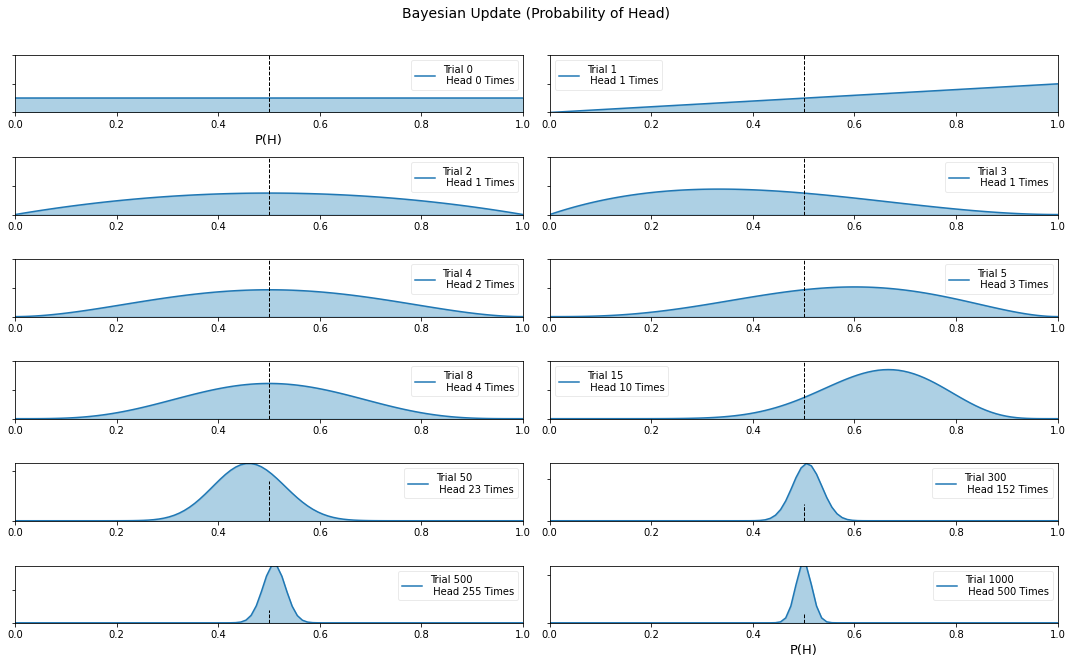

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize

figsize(15, 9)

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 300, 500, 1000]
data = stats.bernoulli.rvs(0.5, size = n_trials[-1]) # binomial with p(h) = 0.5
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
  sx = plt.subplot(int(len(n_trials) / 2), 2, k+1)
  plt.xlabel("P(H)", fontsize = 13) if k in [0, len(n_trials) - 1] else None
  plt.setp(sx.get_yticklabels(), visible = False)
  heads = data[:N].sum()
  y = dist.pdf(x, 1 + heads, 1 + N - heads)
  plt.plot(x, y, label = 'Trial %d \n Head %d Times' % (N, heads))
  plt.fill_between(x, 0, y, color = '#348abd', alpha = .4)
  plt.vlines(0.5, 0, 4, color = 'k', linestyles = '--', lw = 1)

  leg = plt.legend()
  leg.get_frame().set_alpha(0.4)
  plt.autoscale(tight = True)

plt.suptitle('Bayesian Update (Probability of Head)', y = 1.02, fontsize = 14)
plt.tight_layout()

# 신뢰구간 with 베이지안

In [11]:
import numpy as np

from scipy import stats

coinflips = np.random.binomial(1, 0.5, 20)
coinflips

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

## Frequency 기반 신뢰구간 추정 ( n123의 코드 )

In [12]:
def confidence_interval(data, confidence = 0.95):
  
    """
      주어진 데이터의 표본 평균에 대한 신뢰 구간을 계산.
      기본 값으로 t-분포와 양방향 (two-tailed), 95%의 신뢰도를 사용. 
  
      입력 값 : 
        data - 여러 개로 이루어진 (list 혹은 numpy 배열) 표본 관측치
        confidence - 신뢰구간을 위한 신뢰도 
      
      반환 되는 값:
        (평균, 하한, 상한구간)으로 이루어진 tuple
    """
  
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    s = data.std(ddof = 1)
    stderr = s / np.sqrt(n)
    print(stderr)
    
    t = stats.t.ppf( (1 + confidence) / 2.0 , n - 1)
    margin_of_error = t * stderr
    interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return (mean, mean - interval, mean + interval)

confidence_interval(coinflips)

0.11413288653790231


(0.55, 0.31111712307712147, 0.7888828769228786)

## Bayesian 기반 신뢰구간 추정 (SciPy 사용) 

In [13]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

mean_CI, _, _ = stats.bayes_mvs(coinflips, alpha = .95) # mean , variance, std

# mean_cntr, var_cntr, std_cntr

mean_CI

# 윗 결과와 유사함

Mean(statistic=0.55, minmax=(0.31111712307712147, 0.7888828769228786))

# Bayesian Optimize

<img src='https://i.imgur.com/S0aFeM8.png' width = 600>

<https://github.com/fmfn/BayesianOptimization>

In [14]:
!pip3 install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
def black_box_func(x, y):
  return -x ** 2 - (y-1) ** 2 + 1

pbounds = {'x' : (2, 4), 'y': (-3, 3)}

from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f = black_box_func, 
                                 pbounds = pbounds, 
                                 random_state = 1)

optimizer.maximize(init_points = 2, n_iter = 10) 

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | -7.135    | 2.834     | 1.322     |
| 2         | -7.78     | 2.0       | -1.186    |
| 3         | -7.11     | 2.218     | -0.7867   |
| 4         | -12.4     | 3.66      | 0.9608    |
| 5         | -6.999    | 2.23      | -0.7392   |
| 6         | -3.047    | 2.0       | 0.783     |
| 7         | -4.166    | 2.0       | 2.08      |
| 8         | -31.0     | 4.0       | -3.0      |
| 9         | -19.0     | 4.0       | 3.0       |
| 10        | -3.134    | 2.0       | 1.366     |
| 11        | -3.456    | 2.0       | 0.325     |
| 12        | -3.003    | 2.0       | 1.051     |


In [16]:
print(optimizer.max)

{'target': -3.0025678729637413, 'params': {'x': 2.0, 'y': 1.0506741843914769}}


In [17]:
import numpy as np

res = -9999
x_val = -9999
y_val = -9999

iter_cnt = 0

for x in np.arange(2, 40.1, 0.1):
  for y in np.arange(-3, 30.1, 0.1):
    curr_res = black_box_func(x, y)
    iter_cnt += 1

    if curr_res > res:
      res = curr_res
      x_val = x
      y_val = y

print(iter_cnt)
print(res)
print(x_val)
print(y_val)

126111
-3.0
2.0
1.0000000000000036


**전범위 조사 결과**

$x$ = 2, $y$ = 1~ 일때가 Maximized value

**Bayesian** 

$x$ = 2, $y$ = 0.9407 일때가 Maximized value

# Exercise

# 1. Multiple Choice Test

객관식 문제를 푸는 과정에서, 학생은 답을 이미 알고 있거나 찍어야 한다. 

학생이 답을 알 확률은 $p$이고, 답을 찍어서 맞출 확률이 $1\over{m}$ 이라고 할 때 $m$과 $p$를 입력받아 학생이 문제의 답을 알고 맞췄을 확률을 계산하는 함수를 작성.

In [1]:
def correct(p, m):
  return p / (p + ((1 - p) * (1 / m)))

In [2]:
correct(0.5, 5)

0.8333333333333334

# 2. Blood Test

특정 질병을 가지고 있는 경우 **99%** 의 확률로 탐지 할 수 있는 실험방법이 있다.

그러나 동시에 이 방법은, **1%** 의 확률로 질병이 없지만 질병이 있다고 진단 하는 경우도 있음.

실제로 모든 인구중 **0.5%** 만이 이 질병을 가지고 있다고 한다.

특정 사람이 이 방법을 통해 질병이 있다고 진단 받았을때, 실제로 질병을 가지고 있을 확률을 구하는 함수를 작성.

In [3]:
def disease(prior, tpr, fpr):
  return (tpr * prior) / ((tpr * prior) + (fpr * (1 - prior)))

In [4]:
disease(0.005, 0.99, 0.01)

0.33221476510067116

## 다음 문제를 읽고 답을 구하라 
> Source : Introduction to Probability and Statistics for Engineers and Scientists, 4th Ed.

At a certain stage of a criminal investigation, the inspector in charge is **60%** convinced of the guilty of a certain suspect. <br>
Suppose now that a new piece of evidence that shows that the criminal has a left-handedness is uncovered. <br>
If **20% of population possesses this characteristic**, how certain of the guilt of the suspect should the inspector now be if it turns out that the suspect is among this group? <br>

P(유죄) : 0.6

P(무죄) : 0.4

P(왼손|무죄) : 0.2

P(왼손|유죄) : 1


구하고자 하는 것: P(유죄|왼손)

In [18]:
answer = 0.6 / (0.6 + (0.2 * 0.4))
answer

0.8823529411764707

After that, the new evidence is subject to different possible interpretations, and in fact only shows that it is **90% likely that the criminal possess this characteristic**.  
In this case how likely would it be that the suspect is guilty?

P(newE | G) : 0.9

P(newE | I) : 0.1

In [20]:
answer2 = 0.9 * 0.6 / ((0.9 * 0.6) + (0.2 * 0.4))
answer2

0.8709677419354838

만약 the new evidence가 아예 새로운 독립적인 증거일때,


P(G) : answer

P(I) : 1 - answer

P(newE | G) : 0.9

P(newE | I) : 0.1

what i want: P(G | newE)

In [21]:
answer3 = answer * 0.9 / ((0.9 * answer) + (0.1 * (1 - answer)))
answer3

0.9854014598540146